In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve

from sklearn import metrics

import contractions

import scikitplot as skplt
import matplotlib.pyplot as plt

In [2]:
yelp_data_5k = pd.read_csv(r"C:\Users\sebas\Documents\School\bachelor-final\Dataset\PROCESSED_RESTAURANT_REVIEWS_5k.csv")

In [3]:
yelp_data_5k.head()

,Unnamed: 0,reviewContent,usefulCount,coolCount,funnyCount,rating,restaurantID,reviewCleanWithStopwords,reviewCleanNoStopwords,reviewCleanPorterStemmer,reviewCleanSnowballStemmer,reviewCleanLemmatized,reviewCleanLancaster
0,0,"""'Check, Please."" The bartender was unable to ...",18,11,25,1,VZHyAmdFDreQqL0BT-zdoA,check please the bartender was unable to recom...,check please bartender unable recommend beer t...,check pleas bartend unabl recommend beer tap t...,check pleas bartend unabl recommend beer tap t...,check please bartender unable recommend beer t...,check pleas bartend un recommend beer tap tri ...
1,1,"""2 stars for disappointing food, one star for ...",14,10,7,3,tFcmrGLZNEymSnijoTPmqw,stars for disappointing food one star for grea...,stars disappointing food one star great servic...,star disappoint food one star great servic rea...,star disappoint food one star great servic rea...,star disappoint food one star great service re...,star disappoint food on star gre serv read iai...
2,2,"""A Divine Dialogue"" God: ""Britton. Times up. T...",14,16,23,5,INvIaBFnAvGxzTXFWHzGvA,divine dialogue god britton times up the world...,divine dialogue god britton times world going ...,divin dialogu god britton time world go end to...,divin dialogu god britton time world go end to...,divine dialogue god britton time world go end ...,divin dialog god britton tim world going end t...
3,3,"""A Place To Go When You Have Time"" It was a mi...",13,10,10,5,FySId5SjNhkrtPA5qktdxg,place to go when you have time it was misty br...,place go time misty breezy summer night friend...,place go time misti breezi summer night friend...,place go time misti breezi summer night friend...,place go time misty breezy summer night friend...,plac go tim misty breezy sum night friend jere...
4,4,"""A Thaiphoon of Flavor"" My First: I never enli...",27,22,28,5,RgeMUiZncTs-VSHQLm0wNg,thaiphoon of flavor my first never enlisted in...,thaiphoon flavor first never enlisted air forc...,thaiphoon flavor first never enlist air forc a...,thaiphoon flavor first never enlist air forc a...,thaiphoon flavor first never enlist air force ...,thaiphoon flav first nev enl air forc allow jo...


In [4]:
yelp_data_5k.rating.value_counts()

2    1250
5    1179
1    1159
3    1130
4    1051
Name: rating, dtype: int64

In [5]:
yelp_data_5k.isnull().values.any()

False

# Remove 3 stars, transform 1,2 to 0 and 4,5 to one

In [6]:
# Get names of indexes for which column rating has value 2
indexNamesRating3 = yelp_data_5k[ yelp_data_5k['rating'] == 3 ].index
 
# Delete these row indexes from dataFrame
yelp_data_5k.drop(indexNamesRating3, inplace=True)

In [7]:
yelp_data_5k.rating.value_counts()

2    1250
5    1179
1    1159
4    1051
Name: rating, dtype: int64

In [8]:
# transform 1 and 2 stars to rating 0 and 4 and 5 stars to rating 1
yelp_data_5k['rating'] = yelp_data_5k['rating'].apply(lambda x: 1 if x>3 else 0)

In [9]:
yelp_data_5k.rating.value_counts()

0    2409
1    2230
Name: rating, dtype: int64

# Allocating each text with its specific cleaning method to a variable

In [10]:
x_cleanWithStopwords = yelp_data_5k["reviewCleanWithStopwords"]
x_cleanNoStopwords = yelp_data_5k["reviewCleanNoStopwords"]
x_porterStemmer = yelp_data_5k["reviewCleanPorterStemmer"]
x_snowballStemmer = yelp_data_5k["reviewCleanSnowballStemmer"]
x_lemmatized = yelp_data_5k["reviewCleanLemmatized"]
x_lancaster = yelp_data_5k["reviewCleanLancaster"]

# Vectorisation

In [11]:
cv = CountVectorizer(ngram_range=(1,2), min_df=5).fit(x_cleanWithStopwords)
x_cleanWithStopwords = cv.transform(x_cleanWithStopwords)

cv = CountVectorizer(ngram_range=(1,2), min_df=5).fit(x_cleanNoStopwords)
x_cleanNoStopwords = cv.transform(x_cleanNoStopwords)

cv = CountVectorizer(ngram_range=(1,2), min_df=5).fit(x_porterStemmer)
x_porterStemmer = cv.transform(x_porterStemmer)

cv = CountVectorizer(ngram_range=(1,2), min_df=5).fit(x_snowballStemmer)
x_snowballStemmer = cv.transform(x_snowballStemmer)

cv = CountVectorizer(ngram_range=(1,2), min_df=5).fit(x_lemmatized)
x_lemmatized = cv.transform(x_lemmatized)

cv = CountVectorizer(ngram_range=(1,2), min_df=5).fit(x_lancaster)
x_lancaster = cv.transform(x_lancaster)

In [12]:
y = yelp_data_5k["rating"]

# Splitting the data for training and testing

In [13]:
x_train_cleanWithStopwords, x_test_cleanWithStopwords, y_train, y_test = train_test_split(x_cleanWithStopwords, y, test_size=0.2, random_state=50)

x_train_cleanNoStopwords, x_test_cleanNoStopwords, y_train, y_test = train_test_split(x_cleanNoStopwords, y, test_size=0.2, random_state=50)

x_train_porterStemmer, x_test_porterStemmer, y_train, y_test = train_test_split(x_porterStemmer, y, test_size=0.2, random_state=50)

x_train_snowballStemmer, x_test_snowballStemmer, y_train, y_test = train_test_split(x_snowballStemmer, y, test_size=0.2, random_state=50)

x_train_lemmatized, x_test_lemmatized, y_train, y_test = train_test_split(x_lemmatized, y, test_size=0.2, random_state=50)

x_train_lancaster, x_test_lancaster, y_train, y_test = train_test_split(x_lancaster, y, test_size=0.2, random_state=50)

# Models
## Multinomial Naive Bayes

WITH STOPWORDS
Confusion Matrix for Multinomial Naive Bayes:
[[435  60]
 [ 60 373]]
Score: 87.07
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       495
           1       0.86      0.86      0.86       433

   micro avg       0.87      0.87      0.87       928
   macro avg       0.87      0.87      0.87       928
weighted avg       0.87      0.87      0.87       928

WITHOUT STOPWORDS
Confusion Matrix for Multinomial Naive Bayes:
[[449  46]
 [ 58 375]]
Score: 88.79
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       495
           1       0.89      0.87      0.88       433

   micro avg       0.89      0.89      0.89       928
   macro avg       0.89      0.89      0.89       928
weighted avg       0.89      0.89      0.89       928

PORTERSTEMMER
Confusion Matrix for Multinomial Naive Bayes:
[[447  48]
 [ 61 372]]
Score: 88.25
Class

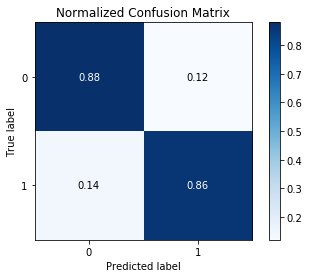

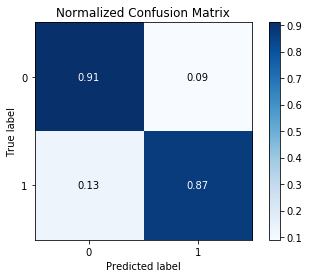

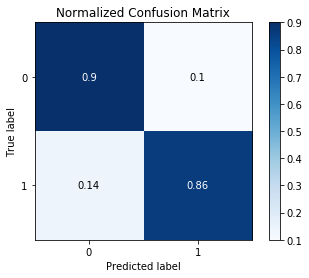

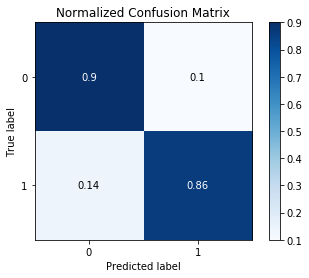

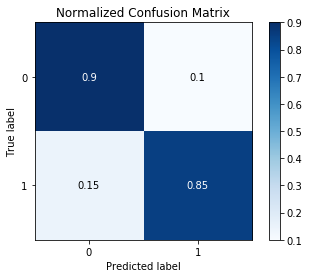

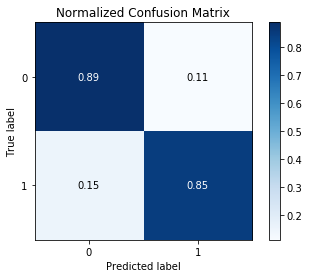

In [14]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# WITH STOPWORDS #################################################################################################################

# initialization
mnb = MultinomialNB()
mnb.fit(x_train_cleanWithStopwords, y_train)

# predicting
prediction = mnb.predict(x_test_cleanWithStopwords)

# generating and printing confusion matrix
print("WITH STOPWORDS")
print("Confusion Matrix for Multinomial Naive Bayes:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("cv_unibi_mnb_with_stopwords.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# WITHOUT STOPWORDS #################################################################################################################


# initialization
mnb = MultinomialNB()
mnb.fit(x_train_cleanNoStopwords, y_train)

# predicting
prediction = mnb.predict(x_test_cleanNoStopwords)

# generating and printing confusion matrix
print("WITHOUT STOPWORDS")
print("Confusion Matrix for Multinomial Naive Bayes:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("cv_unibi_mnb_no_stopwords.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# PORTERSTEMMER #################################################################################################################


# initialization
mnb = MultinomialNB()
mnb.fit(x_train_porterStemmer, y_train)

# predicting
prediction = mnb.predict(x_test_porterStemmer)

# generating and printing confusion matrix
print("PORTERSTEMMER")
print("Confusion Matrix for Multinomial Naive Bayes:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("cv_unibi_mnb_porterstemmer.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# SNOWBALLSTEMMER #################################################################################################################


# initialization
mnb = MultinomialNB()
mnb.fit(x_train_snowballStemmer, y_train)

# predicting
prediction = mnb.predict(x_test_snowballStemmer)

# generating and printing confusion matrix
print("SNOWBALLSTEMMER")
print("Confusion Matrix for Multinomial Naive Bayes:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("cv_unibi_mnb_snowballstemmer.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# LEMMATIZED #################################################################################################################


# initialization
mnb = MultinomialNB()
mnb.fit(x_train_lemmatized, y_train)

# predicting
prediction = mnb.predict(x_test_lemmatized)

# generating and printing confusion matrix
print("LEMMATIZED")
print("Confusion Matrix for Multinomial Naive Bayes:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("cv_unibi_mnb_lemmatized.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# LANCASTER #################################################################################################################


# initialization
mnb = MultinomialNB()
mnb.fit(x_train_lancaster, y_train)

# predicting
prediction = mnb.predict(x_test_lancaster)

# generating and printing confusion matrix
print("LANCASTER")
print("Confusion Matrix for Multinomial Naive Bayes:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("cv_unibi_mnb_lancaster.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))

## Random Forrest

CLEANED WITH STOPWORDS
Confusion Matrix for Random Forest Classifier:
[[435  60]
 [ 57 376]]
Score: 87.39
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       495
           1       0.86      0.87      0.87       433

   micro avg       0.87      0.87      0.87       928
   macro avg       0.87      0.87      0.87       928
weighted avg       0.87      0.87      0.87       928

WITHOUT STOPWORDS
Confusion Matrix for Random Forest Classifier:
[[433  62]
 [ 46 387]]
Score: 88.36
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.89       495
           1       0.86      0.89      0.88       433

   micro avg       0.88      0.88      0.88       928
   macro avg       0.88      0.88      0.88       928
weighted avg       0.88      0.88      0.88       928

PORTERSTEMMER
Confusion Matrix for Random Forest Classifier:
[[440  55]
 [ 45 388]]
Score: 

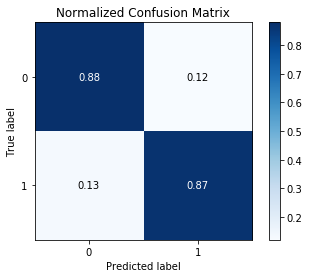

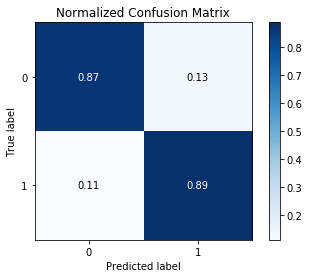

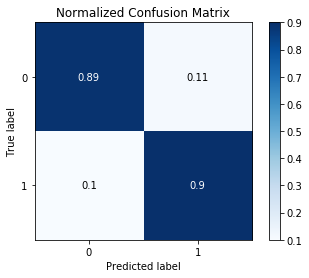

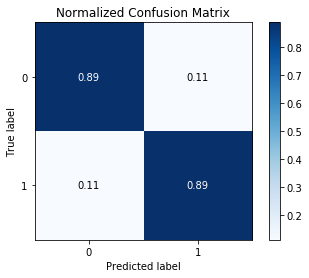

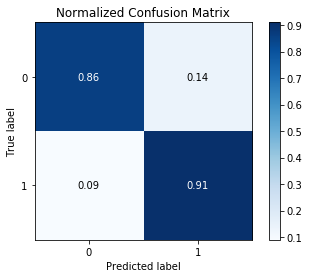

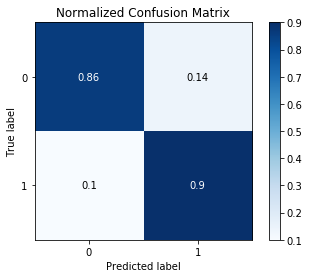

In [15]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# WITH STOPWORDS #################################################################################################################

# initialization
rmf = RandomForestClassifier(n_estimators=200)
rmf.fit(x_train_cleanWithStopwords,y_train)

# predicting
prediction = rmf.predict(x_test_cleanWithStopwords)

# generating and printing confusion matrix
print("CLEANED WITH STOPWORDS")
print("Confusion Matrix for Random Forest Classifier:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("cv_unibi_rmf_with_stopwords.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# WITHOUT STOPWORDS #################################################################################################################


# initialization
rmf = RandomForestClassifier(n_estimators=200)
rmf.fit(x_train_cleanNoStopwords,y_train)

# predicting
prediction = rmf.predict(x_test_cleanNoStopwords)

# generating and printing confusion matrix
print("WITHOUT STOPWORDS")
print("Confusion Matrix for Random Forest Classifier:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("cv_unibi_rmf_no_stopwords.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# PORTERSTEMMER #################################################################################################################


# initialization
rmf = RandomForestClassifier(n_estimators=200)
rmf.fit(x_train_porterStemmer,y_train)

# predicting
prediction = rmf.predict(x_test_porterStemmer)

# generating and printing confusion matrix
print("PORTERSTEMMER")
print("Confusion Matrix for Random Forest Classifier:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("cv_unibi_rmf_porterstemmer.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# SNOWBALLSTEMMER #################################################################################################################


# initialization
rmf = RandomForestClassifier(n_estimators=200)
rmf.fit(x_train_snowballStemmer,y_train)

# predicting
prediction = rmf.predict(x_test_snowballStemmer)

# generating and printing confusion matrix
print("SNOWBALLSTEMMER")
print("Confusion Matrix for Random Forest Classifier:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("cv_unibi_rmf_snowballstemmer.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# LEMMATIZED #################################################################################################################


# initialization
rmf = RandomForestClassifier(n_estimators=200)
rmf.fit(x_train_lemmatized,y_train)

# predicting
prediction = rmf.predict(x_test_lemmatized)

# generating and printing confusion matrix
print("LEMMATIZED")
print("Confusion Matrix for Random Forest Classifier:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("cv_unibi_rmf_lemmatized.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# LANCASTER #################################################################################################################


# initialization
rmf = RandomForestClassifier(n_estimators=200)
rmf.fit(x_train_lancaster,y_train)

# predicting
prediction = rmf.predict(x_test_lancaster)

# generating and printing confusion matrix
print("LANCASTER")
print("Confusion Matrix for Random Forest Classifier:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("cv_unibi_rmf_lancaster.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))

## Decision Tree

WITH STOPWORDS
Confusion Matrix for Decision Tree:
[[357 138]
 [109 324]]
Score: 73.38
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.72      0.74       495
           1       0.70      0.75      0.72       433

   micro avg       0.73      0.73      0.73       928
   macro avg       0.73      0.73      0.73       928
weighted avg       0.74      0.73      0.73       928

WITHOUT STOPWORDS
Confusion Matrix for Decision Tree:
[[342 153]
 [124 309]]
Score: 70.15
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.69      0.71       495
           1       0.67      0.71      0.69       433

   micro avg       0.70      0.70      0.70       928
   macro avg       0.70      0.70      0.70       928
weighted avg       0.70      0.70      0.70       928

PORTERSTEMMER
Confusion Matrix for Decision Tree:
[[355 140]
 [115 318]]
Score: 72.52
Classification Report:
            

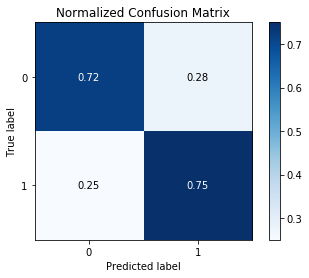

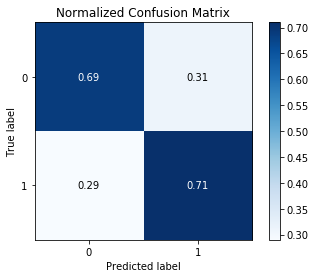

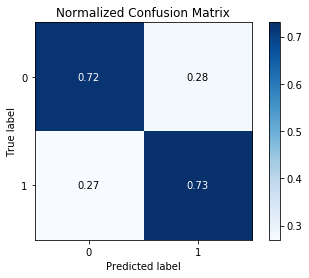

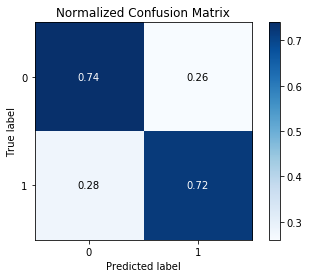

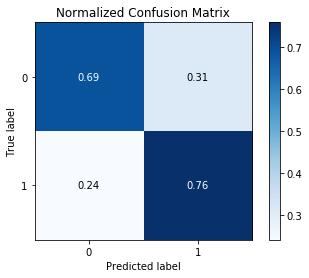

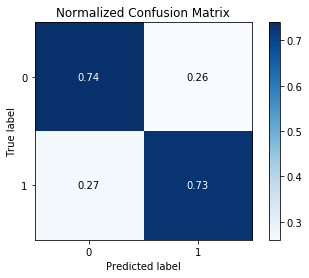

In [16]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier

# WITH STOPWORDS #################################################################################################################

# initialization
dt = DecisionTreeClassifier()
dt.fit(x_train_cleanWithStopwords,y_train)

# predicting
prediction = dt.predict(x_test_cleanWithStopwords)
print("WITH STOPWORDS")
print("Confusion Matrix for Decision Tree:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("cv_unibi_dt_with_stopwords.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# WITHOUT STOPWORDS #################################################################################################################

# initialization
dt = DecisionTreeClassifier()
dt.fit(x_train_cleanNoStopwords,y_train)

# predicting
prediction = dt.predict(x_test_cleanNoStopwords)
print("WITHOUT STOPWORDS")
print("Confusion Matrix for Decision Tree:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("cv_unibi_dt_no_stopwords.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# PORTERSTEMMER #################################################################################################################

# initialization
dt = DecisionTreeClassifier()
dt.fit(x_train_porterStemmer,y_train)

# predicting
prediction = dt.predict(x_test_porterStemmer)
print("PORTERSTEMMER")
print("Confusion Matrix for Decision Tree:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("cv_unibi_dt_porterstemmer.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# SNOWBALLSTEMMER #################################################################################################################

# initialization
dt = DecisionTreeClassifier()
dt.fit(x_train_snowballStemmer,y_train)

# predicting
prediction = dt.predict(x_test_snowballStemmer)
print("SNOWBALLSTEMMER")
print("Confusion Matrix for Decision Tree:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("cv_unibi_dt_snowballstemmer.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# LEMMATIZED #################################################################################################################

# initialization
dt = DecisionTreeClassifier()
dt.fit(x_train_lemmatized,y_train)

# predicting
prediction = dt.predict(x_test_lemmatized)
print("LEMMATIZED")
print("Confusion Matrix for Decision Tree:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("cv_unibi_dt_lemmatized.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# LANCASTER #################################################################################################################

# initialization
dt = DecisionTreeClassifier()
dt.fit(x_train_lancaster,y_train)

# predicting
prediction = dt.predict(x_test_lancaster)
print("LANCASTER")
print("Confusion Matrix for Decision Tree:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("cv_unibi_dt_lancaster.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))

# SVC

CLEANED WITH STOPWORDS
Confusion Matrix for Support Vector Machines:
[[459  36]
 [ 42 391]]
Score: 91.59
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92       495
           1       0.92      0.90      0.91       433

   micro avg       0.92      0.92      0.92       928
   macro avg       0.92      0.92      0.92       928
weighted avg       0.92      0.92      0.92       928

WITHOUT STOPWORDS
Confusion Matrix for Support Vector Machines:
[[453  42]
 [ 46 387]]
Score: 90.52
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91       495
           1       0.90      0.89      0.90       433

   micro avg       0.91      0.91      0.91       928
   macro avg       0.90      0.90      0.90       928
weighted avg       0.91      0.91      0.91       928

PORTERSTEMMER
Confusion Matrix for Support Vector Machines:
[[457  38]
 [ 38 395]]
Score: 91.

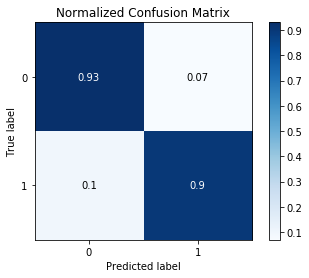

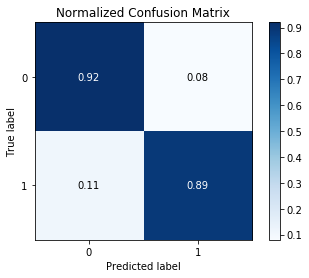

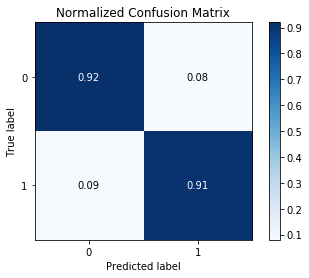

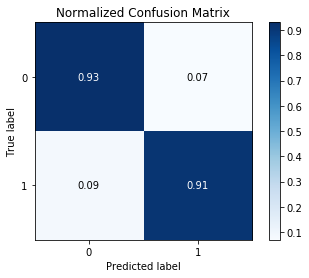

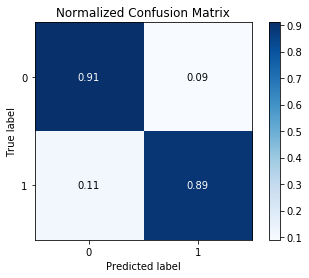

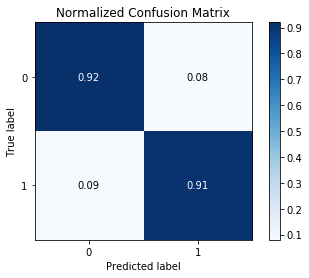

In [17]:
# SVC
from sklearn.svm import SVC

# WITH STOPWORDS #################################################################################################################

# initialization
svm = SVC(random_state=101, kernel='linear')
svm.fit(x_train_cleanWithStopwords,y_train)

# predicting
prediction = svm.predict(x_test_cleanWithStopwords)
print("CLEANED WITH STOPWORDS")
print("Confusion Matrix for Support Vector Machines:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("cv_unibi_svc_with_stopwords.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# WITHOUT STOPWORDS #################################################################################################################

# initialization
svm = SVC(random_state=101, kernel='linear')
svm.fit(x_train_cleanNoStopwords,y_train)

# predicting
prediction = svm.predict(x_test_cleanNoStopwords)
print("WITHOUT STOPWORDS")
print("Confusion Matrix for Support Vector Machines:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("cv_unibi_svc_no_stopwords.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# PORTERSTEMMER #################################################################################################################

# initialization
svm = SVC(random_state=101, kernel='linear')
svm.fit(x_train_porterStemmer,y_train)

# predicting
prediction = svm.predict(x_test_porterStemmer)
print("PORTERSTEMMER")
print("Confusion Matrix for Support Vector Machines:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("cv_unibi_svc_porterstemmer.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# SNOWBALLSTEMMER #################################################################################################################

# initialization
svm = SVC(random_state=101, kernel='linear')
svm.fit(x_train_snowballStemmer,y_train)

# predicting
prediction = svm.predict(x_test_snowballStemmer)
print("SNOWBALLSTEMMER")
print("Confusion Matrix for Support Vector Machines:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("cv_unibi_svc_snowballstemmer.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# LEMMATIZED #################################################################################################################

# initialization
svm = SVC(random_state=101, kernel='linear')
svm.fit(x_train_lemmatized,y_train)

# predicting
prediction = svm.predict(x_test_lemmatized)
print("LEMMATIZED")
print("Confusion Matrix for Support Vector Machines:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("cv_unibi_svc_lemmatized.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# LANCASTER #################################################################################################################

# initialization
svm = SVC(random_state=101, kernel='linear')
svm.fit(x_train_lancaster,y_train)

# predicting
prediction = svm.predict(x_test_lancaster)
print("LANCASTER")
print("Confusion Matrix for Support Vector Machines:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("cv_unibi_svc_lancaster.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))

# Gradient Boosting Classifier

WITH STOPWORDS
Confusion Matrix for Gradient Boosting Classifier:
[[447  48]
 [ 60 373]]
Score: 88.36
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89       495
           1       0.89      0.86      0.87       433

   micro avg       0.88      0.88      0.88       928
   macro avg       0.88      0.88      0.88       928
weighted avg       0.88      0.88      0.88       928

WITHOUT STOPWORDS
Confusion Matrix for Gradient Boosting Classifier:
[[445  50]
 [ 64 369]]
Score: 87.72
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.89       495
           1       0.88      0.85      0.87       433

   micro avg       0.88      0.88      0.88       928
   macro avg       0.88      0.88      0.88       928
weighted avg       0.88      0.88      0.88       928

PORTERSTEMMER
Confusion Matrix for Gradient Boosting Classifier:
[[436  59]
 [ 64 369]]
Sco

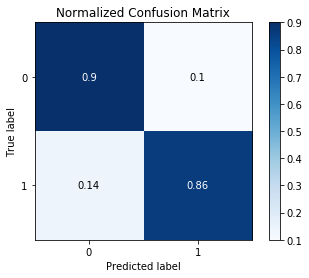

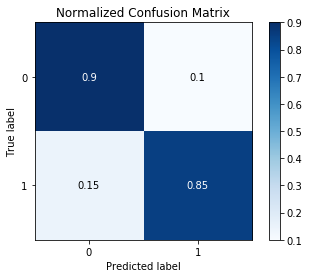

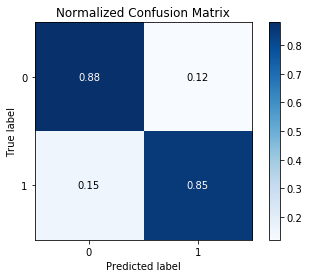

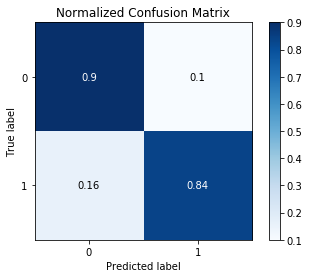

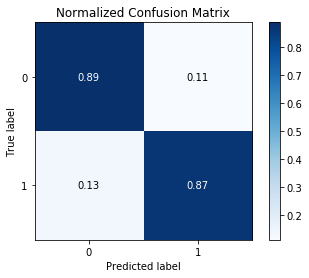

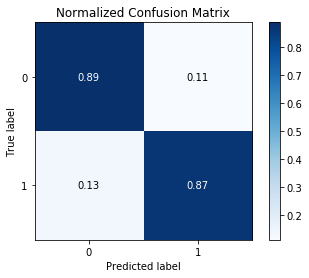

In [18]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

# WITH STOPWORDS #################################################################################################################

# initialization
gbi = GradientBoostingClassifier(learning_rate=0.1,max_depth=5,max_features=0.5,random_state=101)
gbi.fit(x_train_cleanWithStopwords,y_train)

# predicting
prediction = gbi.predict(x_test_cleanWithStopwords)
print("WITH STOPWORDS")
print("Confusion Matrix for Gradient Boosting Classifier:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("cv_unibi_gbi_with_stopwords.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))

# WITHOUT STOPWORDS #################################################################################################################

# initialization
gbi = GradientBoostingClassifier(learning_rate=0.1,max_depth=5,max_features=0.5,random_state=101)
gbi.fit(x_train_cleanNoStopwords,y_train)

# predicting
prediction = gbi.predict(x_test_cleanNoStopwords)
print("WITHOUT STOPWORDS")
print("Confusion Matrix for Gradient Boosting Classifier:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("cv_unibi_gbi_no_stopwords.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# PORTERSTEMMER #################################################################################################################

# initialization
gbi = GradientBoostingClassifier(learning_rate=0.1,max_depth=5,max_features=0.5,random_state=101)
gbi.fit(x_train_porterStemmer,y_train)

# predicting
prediction = gbi.predict(x_test_porterStemmer)
print("PORTERSTEMMER")
print("Confusion Matrix for Gradient Boosting Classifier:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("cv_unibi_gbi_porterstemmer.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# SNOWBALLSTEMMER #################################################################################################################

# initialization
gbi = GradientBoostingClassifier(learning_rate=0.1,max_depth=5,max_features=0.5,random_state=101)
gbi.fit(x_train_snowballStemmer,y_train)

# predicting
prediction = gbi.predict(x_test_snowballStemmer)
print("PORTERSTEMMER")
print("Confusion Matrix for Gradient Boosting Classifier:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("cv_unibi_gbi_snowballstemmer.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# LEMMATIZED #################################################################################################################

# initialization
gbi = GradientBoostingClassifier(learning_rate=0.1,max_depth=5,max_features=0.5,random_state=101)
gbi.fit(x_train_lemmatized,y_train)

# predicting
prediction = gbi.predict(x_test_lemmatized)
print("LEMMATIZED")
print("Confusion Matrix for Gradient Boosting Classifier:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("cv_unibi_gbi_lemmatized.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))



# LANCASTER #################################################################################################################

# initialization
gbi = GradientBoostingClassifier(learning_rate=0.1,max_depth=5,max_features=0.5,random_state=101)
gbi.fit(x_train_lancaster,y_train)

# predicting
prediction = gbi.predict(x_test_lancaster)
print("LANCASTER")
print("Confusion Matrix for Gradient Boosting Classifier:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("cv_unibi_gbi_lancaster.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))

CLEANED WITH STOPWORDS
Confusion Matrix for K Neighbors Classifier:
[[449  46]
 [232 201]]
Score: 70.04
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.91      0.76       495
           1       0.81      0.46      0.59       433

   micro avg       0.70      0.70      0.70       928
   macro avg       0.74      0.69      0.68       928
weighted avg       0.73      0.70      0.68       928

WITHOUT STOPWORDS
Confusion Matrix for K Neighbors Classifier:
[[489   6]
 [403  30]]
Score: 55.93
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.99      0.71       495
           1       0.83      0.07      0.13       433

   micro avg       0.56      0.56      0.56       928
   macro avg       0.69      0.53      0.42       928
weighted avg       0.68      0.56      0.44       928

PORTERSTEMMER
Confusion Matrix for K Neighbors Classifier:
[[485  10]
 [399  34]]
Score: 55.93


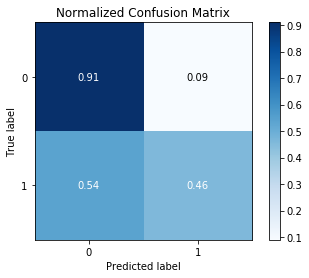

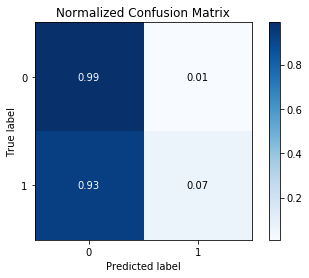

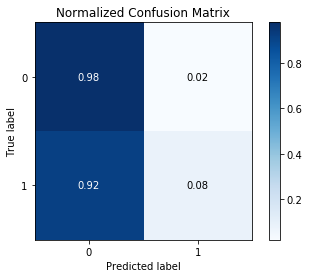

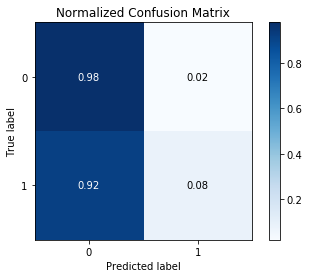

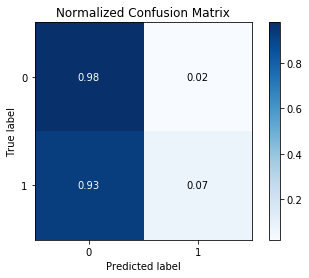

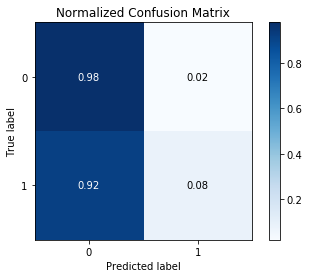

In [19]:
# K Nearest Neighbour Algorithm
from sklearn.neighbors import KNeighborsClassifier

# WITH STOPWORDS #################################################################################################################

# initialization
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train_cleanWithStopwords,y_train)

# predicting
prediction = knn.predict(x_test_cleanWithStopwords)
print("CLEANED WITH STOPWORDS")
print("Confusion Matrix for K Neighbors Classifier:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("cv_unibi_knn_with_stopwords.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))

# WITHOUT STOPWORDS #################################################################################################################

# initialization
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train_cleanNoStopwords,y_train)

# predicting
prediction = knn.predict(x_test_cleanNoStopwords)
print("WITHOUT STOPWORDS")
print("Confusion Matrix for K Neighbors Classifier:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("cv_unibi_knn_no_stopwords.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# PORTERSTEMMER #################################################################################################################

# initialization
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train_porterStemmer,y_train)

# predicting
prediction = knn.predict(x_test_porterStemmer)
print("PORTERSTEMMER")
print("Confusion Matrix for K Neighbors Classifier:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("cv_unibi_knn_porterstemmer.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# SNOWBALLSTEMMER #################################################################################################################

# initialization
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train_snowballStemmer,y_train)

# predicting
prediction = knn.predict(x_test_snowballStemmer)
print("SNOWBALLSTEMMER")
print("Confusion Matrix for K Neighbors Classifier:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("cv_unibi_knn_snowballstemmer.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# LEMMATIZED #################################################################################################################

# initialization
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train_lemmatized,y_train)

# predicting
prediction = knn.predict(x_test_lemmatized)
print("LEMMATIZED")
print("Confusion Matrix for K Neighbors Classifier:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("cv_unibi_knn_lemmatized.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# LANCASTER #################################################################################################################

# initialization
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train_lancaster,y_train)

# predicting
prediction = knn.predict(x_test_lancaster)
print("LANCASTER")
print("Confusion Matrix for K Neighbors Classifier:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("cv_unibi_knn_lancaster.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))

# Multilayer Perceptron Classifier

WITH STOPWORDS
Confusion Matrix for Multilayer Perceptron Classifier:
[[475  20]
 [ 31 402]]
Score: 94.5
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       495
           1       0.95      0.93      0.94       433

   micro avg       0.95      0.95      0.95       928
   macro avg       0.95      0.94      0.94       928
weighted avg       0.95      0.95      0.94       928

WITHOUT STOPWORDS
Confusion Matrix for Multilayer Perceptron Classifier:
[[475  20]
 [ 31 402]]
Score: 94.5
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       495
           1       0.95      0.93      0.94       433

   micro avg       0.95      0.95      0.95       928
   macro avg       0.95      0.94      0.94       928
weighted avg       0.95      0.95      0.94       928

PORTERSTEMMER
Confusion Matrix for Multilayer Perceptron Classifier:
[[465  30]
 [ 29

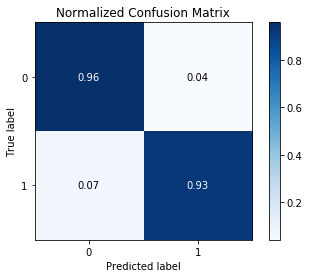

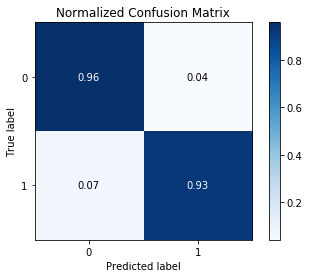

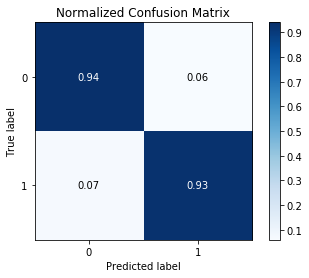

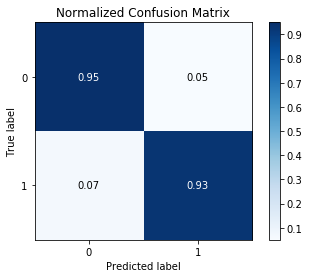

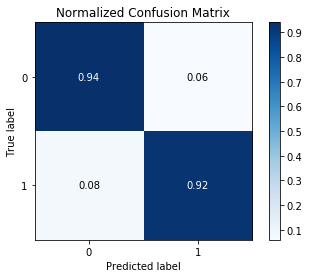

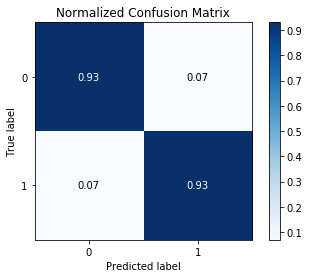

In [20]:
# Mulilayer Perceptron Classifier
from sklearn.neural_network import MLPClassifier

# WITH STOPWORDS #################################################################################################################

# initialization
mlp = MLPClassifier()
mlp.fit(x_train_cleanWithStopwords,y_train)

# predicting
prediction = mlp.predict(x_test_cleanWithStopwords)
print("WITH STOPWORDS")
print("Confusion Matrix for Multilayer Perceptron Classifier:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("cv_unibi_mlp_with_stopwords.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))

# WITHOUT STOPWORDS #################################################################################################################

# initialization
mlp = MLPClassifier()
mlp.fit(x_train_cleanNoStopwords,y_train)

# predicting
prediction = mlp.predict(x_test_cleanNoStopwords)
print("WITHOUT STOPWORDS")
print("Confusion Matrix for Multilayer Perceptron Classifier:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("cv_unibi_mlp_no_stopwords.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# PORTERSTEMMER #################################################################################################################

# initialization
mlp = MLPClassifier()
mlp.fit(x_train_porterStemmer,y_train)

# predicting
prediction = mlp.predict(x_test_porterStemmer)
print("PORTERSTEMMER")
print("Confusion Matrix for Multilayer Perceptron Classifier:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("cv_unibi_mlp_porterstemmer.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# SNOWBALLSTEMMER #################################################################################################################

# initialization
mlp = MLPClassifier()
mlp.fit(x_train_snowballStemmer,y_train)

# predicting
prediction = mlp.predict(x_test_snowballStemmer)
print("SNOWBALLSTEMMER")
print("Confusion Matrix for Multilayer Perceptron Classifier:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("cv_unibi_mlp_snowballstemmer.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# LEMMATIZED #################################################################################################################

# initialization
mlp = MLPClassifier()
mlp.fit(x_train_lemmatized,y_train)

# predicting
prediction = mlp.predict(x_test_lemmatized)
print("LEMMATIZED")
print("Confusion Matrix for Multilayer Perceptron Classifier:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("cv_unibi_mlp_lemmatized.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# LANCASTER #################################################################################################################

# initialization
mlp = MLPClassifier()
mlp.fit(x_train_lancaster,y_train)

# predicting
prediction = mlp.predict(x_test_lancaster)
print("LANCASTER")
print("Confusion Matrix for Multilayer Perceptron Classifier:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("cv_unibi_mlp_lancaster.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))

# Logistic Regression

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


WITH STOPWORDS
CLEANED WITH STOPWORDS
Confusion Matrix for Logistic Regression:
[[460  35]
 [ 30 403]]
Score: 93.0
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93       495
           1       0.92      0.93      0.93       433

   micro avg       0.93      0.93      0.93       928
   macro avg       0.93      0.93      0.93       928
weighted avg       0.93      0.93      0.93       928

WITHOUT STOPWORDS
CLEANED WITH STOPWORDS
Confusion Matrix for Logistic Regression:
[[458  37]
 [ 30 403]]
Score: 92.78
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93       495
           1       0.92      0.93      0.92       433

   micro avg       0.93      0.93      0.93       928
   macro avg       0.93      0.93      0.93       928
weighted avg       0.93      0.93      0.93       928

PORTERSTEMMER
CLEANED WITH STOPWORDS
Confusion Matrix for Logist

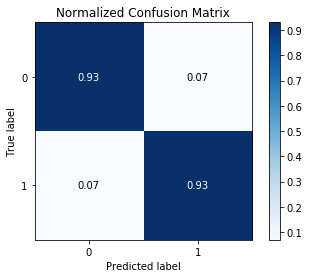

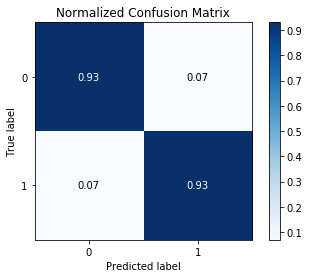

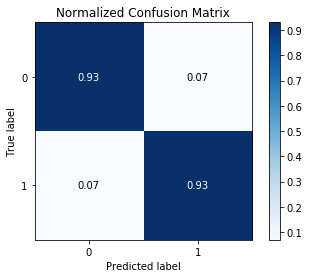

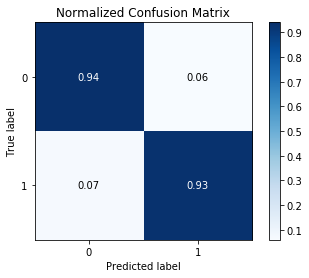

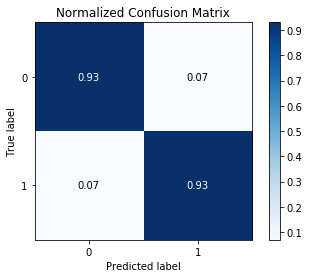

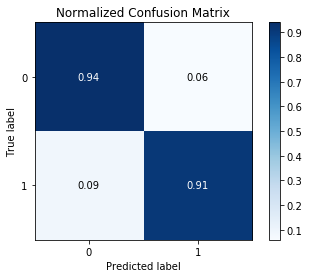

In [21]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# WITH STOPWORDS #################################################################################################################

# initialization
lrg = LogisticRegression(C=1e5, solver='saga', multi_class='multinomial', random_state = 101)
lrg.fit(x_train_cleanWithStopwords,y_train)

# predicting
prediction = lrg.predict(x_test_cleanWithStopwords)
print("WITH STOPWORDS")
print("CLEANED WITH STOPWORDS")
print("Confusion Matrix for Logistic Regression:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("cv_unibi_lrg_with_stopwords.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))

# WITHOUT STOPWORDS #################################################################################################################

# initialization
lrg = LogisticRegression(C=1e5, solver='saga', multi_class='multinomial', random_state = 101)
lrg.fit(x_train_cleanNoStopwords,y_train)

# predicting
prediction = lrg.predict(x_test_cleanNoStopwords)
print("WITHOUT STOPWORDS")
print("CLEANED WITH STOPWORDS")
print("Confusion Matrix for Logistic Regression:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("cv_unibi_lrg_no_stopwords.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# PORTERSTEMMER #################################################################################################################

# initialization
lrg = LogisticRegression(C=1e5, solver='saga', multi_class='multinomial', random_state = 101)
lrg.fit(x_train_porterStemmer,y_train)

# predicting
prediction = lrg.predict(x_test_porterStemmer)
print("PORTERSTEMMER")
print("CLEANED WITH STOPWORDS")
print("Confusion Matrix for Logistic Regression:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("cv_unibi_lrg_porterstemmer.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# SNOWBALLSTEMMER #################################################################################################################

# initialization
lrg = LogisticRegression(C=1e5, solver='saga', multi_class='multinomial', random_state = 101)
lrg.fit(x_train_snowballStemmer,y_train)

# predicting
prediction = lrg.predict(x_test_snowballStemmer)
print("SNOWBALLSTEMMER")
print("CLEANED WITH STOPWORDS")
print("Confusion Matrix for Logistic Regression:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("cv_unibi_lrg_snowballstemmer.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# LEMMATIZED #################################################################################################################

# initialization
lrg = LogisticRegression(C=1e5, solver='saga', multi_class='multinomial', random_state = 101)
lrg.fit(x_train_lemmatized,y_train)

# predicting
prediction = lrg.predict(x_test_lemmatized)
print("LEMMATIZED")
print("CLEANED WITH STOPWORDS")
print("Confusion Matrix for Logistic Regression:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("cv_unibi_lrg_lemmatized.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))

# LANCASTER #################################################################################################################

# initialization
lrg = LogisticRegression(C=1e5, solver='saga', multi_class='multinomial', random_state = 101)
lrg.fit(x_train_lancaster,y_train)

# predicting
prediction = lrg.predict(x_test_lancaster)
print("LANCASTER")
print("CLEANED WITH STOPWORDS")
print("Confusion Matrix for Logistic Regression:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("cv_unibi_lrg_lancaster.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))